In [1]:
#Importing python libraries

import pandas as pd 

#Import package for arrays and math
import numpy as np 

#import packages for data visualisation and colouring
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 

#Import libraries for preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

#Import libraries for PCA analysis and NMF
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

#Import library for KMeans clustering 
from sklearn.cluster import KMeans

#Import nimfa for finding optimal rank 
import nimfa 

#Ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

#This ensures that only one thread is used during execution, preventing the memory leak.
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# Read the dataset including 220 samples and 17 features
df_MB = pd.read_csv('Samples220_Features17_CSC3062_RR_2021.csv',index_col=0)

In [3]:
df_MB

,CSC3062_108_2,CSC3062_109_4,CSC3062_110_4,CSC3062_112_2,CSC3062_113_2,CSC3062_125_4,CSC3062_127_3,CSC3062_130_4,CSC3062_132_4,CSC3062_134_4,...,CSC3062_487_2,CSC3062_537_2,CSC3062_59_2,CSC3062_619_2,CSC3062_135_1,CSC3062_359_1,CSC3062_93_1,CSC3062_30009_1,CSC3062_30131_1,CSC3062_50080_1
feature_1,0.290875,0.890803,0.810322,0.094940,0.150149,0.894331,0.275125,0.827974,0.834517,0.825537,...,0.159070,0.086438,0.121265,0.341698,0.291683,0.056298,0.290960,0.202656,0.035955,0.243998
feature_2,0.810258,0.086271,0.244165,0.821882,0.709219,0.103017,0.909204,0.145578,0.203810,0.242566,...,0.737361,0.353601,0.630064,0.949134,0.949434,0.885854,0.960750,0.962411,0.970746,0.939692
feature_3,0.865808,0.922013,0.896549,0.956021,0.735553,0.952562,0.889457,0.928676,0.687395,0.947010,...,0.474407,0.693952,0.826595,0.830783,0.079525,0.118060,0.154047,0.626990,0.143361,0.476274
feature_4,0.862365,0.065577,0.081449,0.985600,0.858728,0.053551,0.050593,0.116895,0.229992,0.049718,...,0.120007,0.827753,0.870148,0.889740,0.044343,0.064320,0.154475,0.076263,0.159277,0.088622
feature_5,0.966055,0.054152,0.085795,0.997463,0.887684,0.028920,0.059173,0.056659,0.307665,0.011376,...,0.675506,0.921498,0.912418,0.914931,0.078799,0.071866,0.087538,0.199901,0.176992,0.183852
feature_6,0.983397,0.062524,0.108056,0.998507,0.950558,0.046704,0.309769,0.041906,0.285797,0.096073,...,0.649515,0.904265,0.934002,0.969511,0.056228,0.071918,0.068740,0.138466,0.039358,0.121911
feature_7,0.859220,0.327923,0.108450,0.914789,0.868725,0.236933,0.081103,0.420160,0.242028,0.234431,...,0.838702,0.923524,0.828973,0.752382,0.396549,0.683677,0.487989,0.736287,0.196116,0.640017
feature_8,0.771525,0.704931,0.803187,0.236309,0.217483,0.749604,0.806857,0.733636,0.710608,0.859537,...,0.159170,0.215156,0.108606,0.223358,0.899264,0.849367,0.902622,0.877654,0.917164,0.907261
feature_9,0.993792,0.980666,0.984488,0.998409,0.966818,0.990439,0.989620,0.991279,0.988481,0.977576,...,0.954003,0.948566,0.964837,0.960234,0.083984,0.223674,0.266732,0.676721,0.039353,0.526022
feature_10,0.442210,0.051163,0.062969,0.701879,0.040176,0.053461,0.117850,0.051543,0.049863,0.045809,...,0.029961,0.025415,0.248211,0.206878,0.752808,0.858049,0.898918,0.569404,0.613008,0.859174


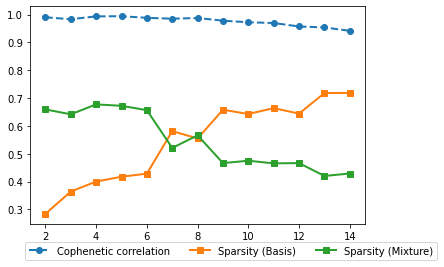

In [4]:
#Initial investigation into what rank to use for k
#perform NMF Using a smaller range as it is only and initial investigation. I will complete a more indepth investigation
#after I used Nimfa imported at the top of the script 
balancedDataset_preprocessed = df_MB
v = np.array(balancedDataset_preprocessed)
rank_num = range(2, 15, 1) #considering a large range value
lsnmf = nimfa.Lsnmf(v, seed='random', max_iter=50)#tries different values for ranks
summary = lsnmf.estimate_rank(rank_range= rank_num, n_run=10, idx =0,what='all')

#The plot will show the cophenetic correlation and the amount of sparseness in the dataset

cophenetic = [summary[rank]['cophenetic'] for rank in rank_num]
sparseness = [summary[rank]['sparseness'] for rank in rank_num]
sparseness_w, sparseness_h = zip(*sparseness)

plt.plot(rank_num, cophenetic, 'o--', label='Cophenetic correlation', linewidth=2)
plt.plot(rank_num, sparseness_w, 's-', label='Sparsity (Basis)', linewidth=2)
plt.plot(rank_num, sparseness_h, 's-', label='Sparsity (Mixture)', linewidth=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.6, -0.06), ncol=3, numpoints=1)

In [5]:
#Performing nmf with the best rank of 3 & 7 
Best_rank = 3
nmf_model = NMF(n_components = Best_rank, init='random')
W_matrix = nmf_model.fit_transform(balancedDataset_preprocessed)
H_matrix = nmf_model.components_
H_matrix

df_H_matrix = pd.DataFrame(data=H_matrix, columns = balancedDataset_preprocessed.columns)
df_H_matrix

,CSC3062_108_2,CSC3062_109_4,CSC3062_110_4,CSC3062_112_2,CSC3062_113_2,CSC3062_125_4,CSC3062_127_3,CSC3062_130_4,CSC3062_132_4,CSC3062_134_4,...,CSC3062_487_2,CSC3062_537_2,CSC3062_59_2,CSC3062_619_2,CSC3062_135_1,CSC3062_359_1,CSC3062_93_1,CSC3062_30009_1,CSC3062_30131_1,CSC3062_50080_1
0,0.148943,0.684322,0.694208,0.043484,0.032968,0.714359,0.586558,0.667157,0.590761,0.710361,...,0.101274,0.015915,0.001490,0.070548,0.000000,0.000000,0.013140,0.222348,0.000000,0.057431
1,0.989772,0.083578,0.074997,1.105793,1.053196,0.047774,0.069814,0.123952,0.225128,0.075849,...,0.675767,1.064128,1.093357,1.027680,0.056348,0.138191,0.080364,0.240448,0.016234,0.222521
2,0.308879,0.000000,0.000000,0.149788,0.132900,0.000000,0.680547,0.000000,0.000000,0.000000,...,0.195739,0.053672,0.139935,0.259711,1.006102,1.145287,1.170937,0.988348,1.163854,1.012058


In [6]:
df_H_matrix = df_H_matrix.T

In [7]:
df_H_matrix

,0,1,2
CSC3062_108_2,0.148943,0.989772,0.308879
CSC3062_109_4,0.684322,0.083578,0.000000
CSC3062_110_4,0.694208,0.074997,0.000000
CSC3062_112_2,0.043484,1.105793,0.149788
CSC3062_113_2,0.032968,1.053196,0.132900
...,...,...,...
CSC3062_359_1,0.000000,0.138191,1.145287
CSC3062_93_1,0.013140,0.080364,1.170937
CSC3062_30009_1,0.222348,0.240448,0.988348
CSC3062_30131_1,0.000000,0.016234,1.163854


In [8]:
# K-means clustering
# How many consistent clusters we will have for this dataset?
# We test the algorithm with up to 10 clusters
# We fit k-means using the transformed data from PCA
wcss = [] # an intial array for the results of kmeans clustering algorithm
for i in range(1,11):
    kmeans_nmf = KMeans(n_clusters = i, init = 'k-means++',n_init='auto', random_state = 42) #creating a clustering model
    kmeans_nmf.fit(df_H_matrix) # applying the clustering model on the projected dataset (dataset: 220 samples & 3 features)
    wcss.append(kmeans_nmf.inertia_)  # inertia_: Sum of squared distances of samples to their closest cluster center,
    # weighted by the sample weights if provided.

In [9]:
wcss

[86.21684956934725,
 32.63852103049786,
 13.131487532646636,
 5.517308023692017,
 4.409455076583302,
 3.8795415415110166,
 3.237159791946569,
 2.8724221816063444,
 2.660305029139245,
 2.4030984376677624]

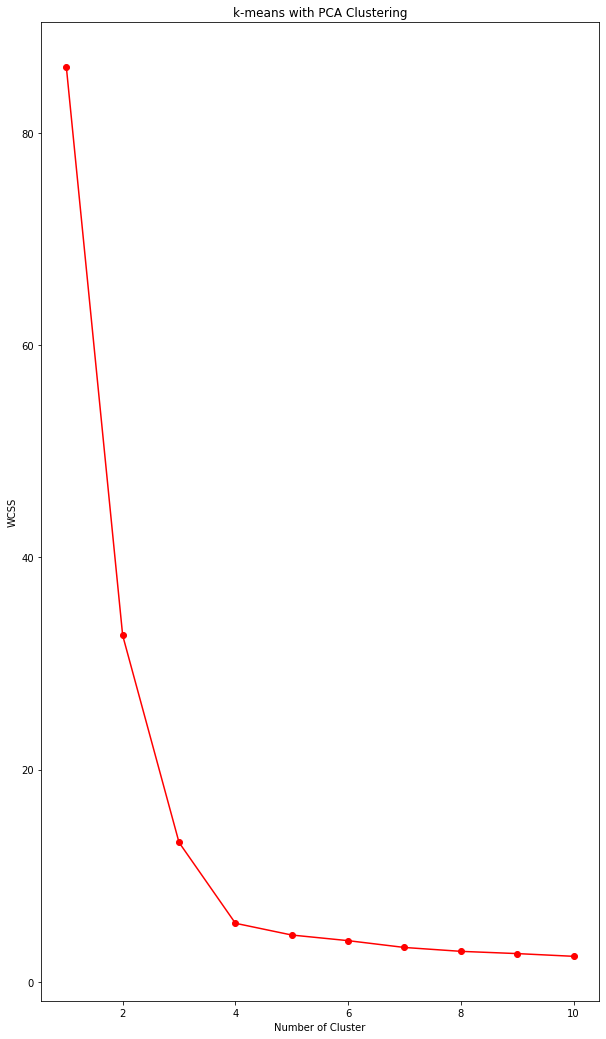

In [10]:
plt.figure(figsize=(10,18))

plt.plot(range(1,11), wcss, marker = 'o', linestyle = '-', color='red')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('k-means with PCA Clustering')
plt.show()

In [ ]:
# By looking at the above graph, we can identify the number of clusters. In this evaluation, we use the Elbow Method. 
# In this approach, we are looking for an elbow (or kink) in the WCSS graph. Usually, the section of the graph before the
# elbow will be steeply declining, while the section after it much smoother. In this example, the elbow is at 4 clusters. 
# Therefore, we will consider a 4-cluster solution.

In [11]:
# Call the KMeans with only 4 clusters
number_of_clusters = 4 # this is based on the above Elbow Method
kmeans_nmf = KMeans(n_clusters = number_of_clusters, init = 'k-means++', random_state = 42,algorithm='lloyd') # change the algorithm later: lloyd, elkan 
kmeans_result = kmeans_nmf.fit(df_H_matrix)
kmeans_result.labels_

array([0, 3, 3, 0, 0, 3, 1, 3, 3, 3, 0, 0, 3, 1, 3, 0, 1, 3, 3, 1, 0, 3,
       3, 0, 1, 1, 3, 1, 3, 3, 0, 3, 1, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 3, 1, 0, 0, 3, 3, 3,
       0, 3, 3, 1, 0, 1, 3, 0, 2, 3, 1, 3, 0, 3, 2, 1, 1, 1, 2, 0, 3, 1,
       1, 3, 3, 3, 3, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0,
       0, 1, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 2, 0, 1, 0, 1,
       0, 3, 0, 0, 0, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [12]:
kmeans_result.cluster_centers_

array([[0.07909126, 1.01233638, 0.12715329],
       [0.57115539, 0.10955662, 0.58123142],
       [0.04531772, 0.11614893, 1.02796778],
       [0.6746844 , 0.08403512, 0.03410865]])

In [13]:
df_MB.T.reset_index(drop = True) # original matrix

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
0,0.290875,0.810258,0.865808,0.862365,0.966055,0.983397,0.859220,0.771525,0.993792,0.442210,0.899341,0.993989,0.085723,0.044409,0.009247,0.728547,0.009350
1,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,0.063914,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753
2,0.810322,0.244165,0.896549,0.081449,0.085795,0.108056,0.108450,0.803187,0.984488,0.062969,0.135716,0.988808,0.046480,0.028105,0.020642,0.057173,0.025406
3,0.094940,0.821882,0.956021,0.985600,0.997463,0.998507,0.914789,0.236309,0.998409,0.701879,0.453133,0.997791,0.105029,0.030050,0.004756,0.871429,0.011524
4,0.150149,0.709219,0.735553,0.858728,0.887684,0.950558,0.868725,0.217483,0.966818,0.040176,0.892199,0.984008,0.061793,0.028857,0.024785,0.740817,0.009471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.056298,0.885854,0.118060,0.064320,0.071866,0.071918,0.683677,0.849367,0.223674,0.858049,0.907254,0.198160,0.594047,0.059437,0.936617,0.751912,0.024637
216,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,0.767178,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664
217,0.202656,0.962411,0.626990,0.076263,0.199901,0.138466,0.736287,0.877654,0.676721,0.569404,0.874040,0.647621,0.635987,0.066916,0.845085,0.495015,0.344584
218,0.035955,0.970746,0.143361,0.159277,0.176992,0.039358,0.196116,0.917164,0.039353,0.613008,0.976368,0.095003,0.531056,0.028969,0.936936,0.349951,0.509395


In [14]:
df_H_matrix #reduced matrix

,0,1,2
CSC3062_108_2,0.148943,0.989772,0.308879
CSC3062_109_4,0.684322,0.083578,0.000000
CSC3062_110_4,0.694208,0.074997,0.000000
CSC3062_112_2,0.043484,1.105793,0.149788
CSC3062_113_2,0.032968,1.053196,0.132900
...,...,...,...
CSC3062_359_1,0.000000,0.138191,1.145287
CSC3062_93_1,0.013140,0.080364,1.170937
CSC3062_30009_1,0.222348,0.240448,0.988348
CSC3062_30131_1,0.000000,0.016234,1.163854


In [15]:
df_nmf_kmeans = pd.concat([df_MB.T, df_H_matrix], axis = 1) # concatinate two datasets

In [16]:
df_nmf_kmeans

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,0,1,2
CSC3062_108_2,0.290875,0.810258,0.865808,0.862365,0.966055,0.983397,0.859220,0.771525,0.993792,0.442210,0.899341,0.993989,0.085723,0.044409,0.009247,0.728547,0.009350,0.148943,0.989772,0.308879
CSC3062_109_4,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,0.063914,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753,0.684322,0.083578,0.000000
CSC3062_110_4,0.810322,0.244165,0.896549,0.081449,0.085795,0.108056,0.108450,0.803187,0.984488,0.062969,0.135716,0.988808,0.046480,0.028105,0.020642,0.057173,0.025406,0.694208,0.074997,0.000000
CSC3062_112_2,0.094940,0.821882,0.956021,0.985600,0.997463,0.998507,0.914789,0.236309,0.998409,0.701879,0.453133,0.997791,0.105029,0.030050,0.004756,0.871429,0.011524,0.043484,1.105793,0.149788
CSC3062_113_2,0.150149,0.709219,0.735553,0.858728,0.887684,0.950558,0.868725,0.217483,0.966818,0.040176,0.892199,0.984008,0.061793,0.028857,0.024785,0.740817,0.009471,0.032968,1.053196,0.132900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSC3062_359_1,0.056298,0.885854,0.118060,0.064320,0.071866,0.071918,0.683677,0.849367,0.223674,0.858049,0.907254,0.198160,0.594047,0.059437,0.936617,0.751912,0.024637,0.000000,0.138191,1.145287
CSC3062_93_1,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,0.767178,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664,0.013140,0.080364,1.170937
CSC3062_30009_1,0.202656,0.962411,0.626990,0.076263,0.199901,0.138466,0.736287,0.877654,0.676721,0.569404,0.874040,0.647621,0.635987,0.066916,0.845085,0.495015,0.344584,0.222348,0.240448,0.988348
CSC3062_30131_1,0.035955,0.970746,0.143361,0.159277,0.176992,0.039358,0.196116,0.917164,0.039353,0.613008,0.976368,0.095003,0.531056,0.028969,0.936936,0.349951,0.509395,0.000000,0.016234,1.163854


In [ ]:
#df_nmf_kmeans = pd.DataFrame() #reset the variable

In [17]:
# Create a new dataframe including three components
#df_nmf_kmeans = pd.concat([df_MB.T, df_H_matrix], axis = 1) # concatinate two datasets
df_nmf_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']#, 'Component 4', 'Component 5', 'Component 6', 'Component 7']
df_nmf_kmeans['Subgroup'] = kmeans_nmf.labels_  # kmeans_result.labels_
df_nmf_kmeans

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,Component 1,Component 2,Component 3,Subgroup
CSC3062_108_2,0.290875,0.810258,0.865808,0.862365,0.966055,0.983397,0.859220,0.771525,0.993792,0.442210,...,0.993989,0.085723,0.044409,0.009247,0.728547,0.009350,0.148943,0.989772,0.308879,0
CSC3062_109_4,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,...,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753,0.684322,0.083578,0.000000,3
CSC3062_110_4,0.810322,0.244165,0.896549,0.081449,0.085795,0.108056,0.108450,0.803187,0.984488,0.062969,...,0.988808,0.046480,0.028105,0.020642,0.057173,0.025406,0.694208,0.074997,0.000000,3
CSC3062_112_2,0.094940,0.821882,0.956021,0.985600,0.997463,0.998507,0.914789,0.236309,0.998409,0.701879,...,0.997791,0.105029,0.030050,0.004756,0.871429,0.011524,0.043484,1.105793,0.149788,0
CSC3062_113_2,0.150149,0.709219,0.735553,0.858728,0.887684,0.950558,0.868725,0.217483,0.966818,0.040176,...,0.984008,0.061793,0.028857,0.024785,0.740817,0.009471,0.032968,1.053196,0.132900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSC3062_359_1,0.056298,0.885854,0.118060,0.064320,0.071866,0.071918,0.683677,0.849367,0.223674,0.858049,...,0.198160,0.594047,0.059437,0.936617,0.751912,0.024637,0.000000,0.138191,1.145287,2
CSC3062_93_1,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,...,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664,0.013140,0.080364,1.170937,2
CSC3062_30009_1,0.202656,0.962411,0.626990,0.076263,0.199901,0.138466,0.736287,0.877654,0.676721,0.569404,...,0.647621,0.635987,0.066916,0.845085,0.495015,0.344584,0.222348,0.240448,0.988348,2
CSC3062_30131_1,0.035955,0.970746,0.143361,0.159277,0.176992,0.039358,0.196116,0.917164,0.039353,0.613008,...,0.095003,0.531056,0.028969,0.936936,0.349951,0.509395,0.000000,0.016234,1.163854,2


In [18]:
# Label clusters with Grp1, Grp2, Grp3 and Grp4
df_nmf_kmeans['Subgroup'] = df_nmf_kmeans['Subgroup'].map({0:'Grp1',
                                                                     1:'Grp2',
                                                                     2:'Grp3',
                                                                     3:'Grp4'})

In [19]:
df_nmf_kmeans

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,Component 1,Component 2,Component 3,Subgroup
CSC3062_108_2,0.290875,0.810258,0.865808,0.862365,0.966055,0.983397,0.859220,0.771525,0.993792,0.442210,...,0.993989,0.085723,0.044409,0.009247,0.728547,0.009350,0.148943,0.989772,0.308879,Grp1
CSC3062_109_4,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,...,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753,0.684322,0.083578,0.000000,Grp4
CSC3062_110_4,0.810322,0.244165,0.896549,0.081449,0.085795,0.108056,0.108450,0.803187,0.984488,0.062969,...,0.988808,0.046480,0.028105,0.020642,0.057173,0.025406,0.694208,0.074997,0.000000,Grp4
CSC3062_112_2,0.094940,0.821882,0.956021,0.985600,0.997463,0.998507,0.914789,0.236309,0.998409,0.701879,...,0.997791,0.105029,0.030050,0.004756,0.871429,0.011524,0.043484,1.105793,0.149788,Grp1
CSC3062_113_2,0.150149,0.709219,0.735553,0.858728,0.887684,0.950558,0.868725,0.217483,0.966818,0.040176,...,0.984008,0.061793,0.028857,0.024785,0.740817,0.009471,0.032968,1.053196,0.132900,Grp1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSC3062_359_1,0.056298,0.885854,0.118060,0.064320,0.071866,0.071918,0.683677,0.849367,0.223674,0.858049,...,0.198160,0.594047,0.059437,0.936617,0.751912,0.024637,0.000000,0.138191,1.145287,Grp3
CSC3062_93_1,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,...,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664,0.013140,0.080364,1.170937,Grp3
CSC3062_30009_1,0.202656,0.962411,0.626990,0.076263,0.199901,0.138466,0.736287,0.877654,0.676721,0.569404,...,0.647621,0.635987,0.066916,0.845085,0.495015,0.344584,0.222348,0.240448,0.988348,Grp3
CSC3062_30131_1,0.035955,0.970746,0.143361,0.159277,0.176992,0.039358,0.196116,0.917164,0.039353,0.613008,...,0.095003,0.531056,0.028969,0.936936,0.349951,0.509395,0.000000,0.016234,1.163854,Grp3


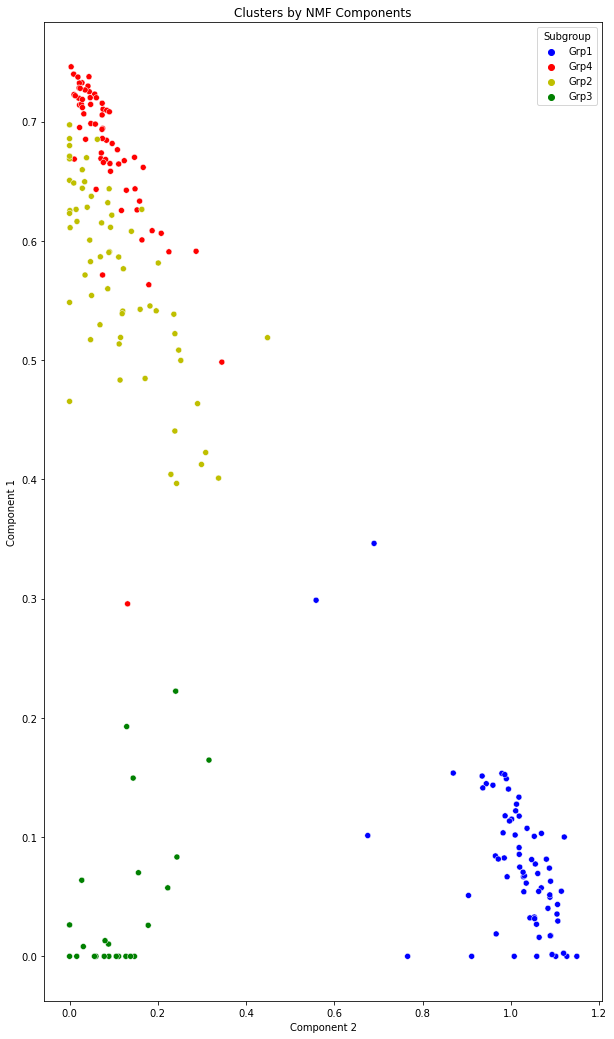

In [20]:
# Visualise the identified clusters by components
x_axis = df_nmf_kmeans['Component 2']
y_axis = df_nmf_kmeans['Component 1']
plt.figure(figsize = (10,18))
sns.scatterplot(x_axis, y_axis, hue = df_nmf_kmeans['Subgroup'], palette = ['b','r','y','g'])
plt.title('Clusters by NMF Components')
plt.show()

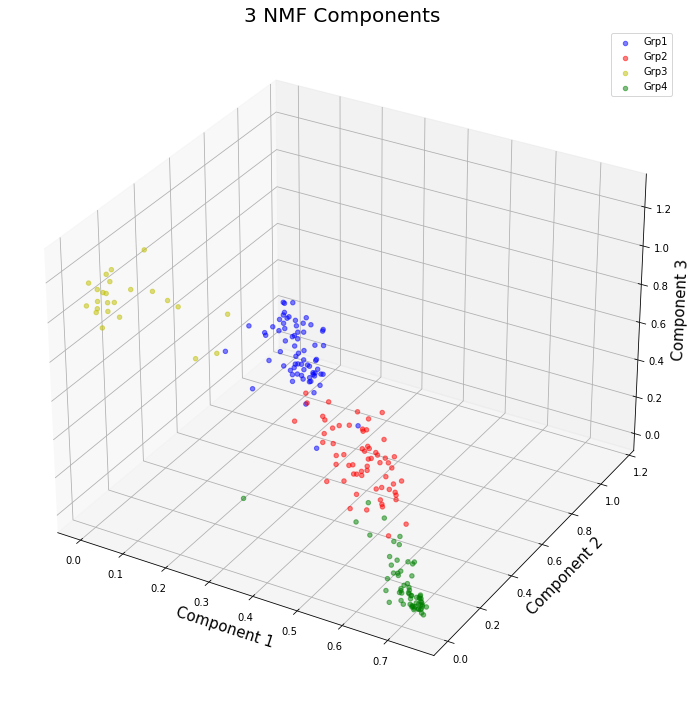

In [21]:
# Visualise the identified clusters by components (3D plot) - this must be replaced with a 3d PCA visualisation!
# df

fig = plt.figure(figsize = (12,16))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_zlabel('Component 3', fontsize = 15)
ax.set_title('3 NMF Components', fontsize = 20)
targets = ['Grp1', 'Grp2', 'Grp3','Grp4']
colors = ['b', 'r', 'y', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_nmf_kmeans['Subgroup'] == target
    ax.scatter(df_nmf_kmeans.loc[indicesToKeep, 'Component 1']
               , df_nmf_kmeans.loc[indicesToKeep, 'Component 2']
               , df_nmf_kmeans.loc[indicesToKeep, 'Component 3']
               , c = color
               , s = 20
              , alpha=0.5)
ax.legend(targets)
ax.grid()

Quantitative performance evaluation

In [22]:
from sklearn.metrics import silhouette_score
# Fit the KMeans model
kmeans_nmf.fit_predict(df_H_matrix)
# Calculate Ave Silhoutte Score for 4 clusters
score = silhouette_score(df_H_matrix, kmeans_nmf.labels_, metric='euclidean')
# Print the score
print('Silhouette ave Score (4 cluster analysis): %.3f' % score)

Silhouette ave Score (4 cluster analysis): 0.708


In [23]:
# silhouette_score gives the average value for all the samples.
# this gives a perspective into density and separation of the formed clusters
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# We need a least 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_H_matrix)
    score = silhouette_score(df_H_matrix, kmeans.labels_)
    silhouette_coefficients.append(score)

In [24]:
print(silhouette_coefficients)

[0.6264801434985218, 0.6391095973849802, 0.7075707552116881, 0.6625685141368143, 0.5303918840641233, 0.5464902704612671, 0.5131890673567383, 0.5152945024592023]


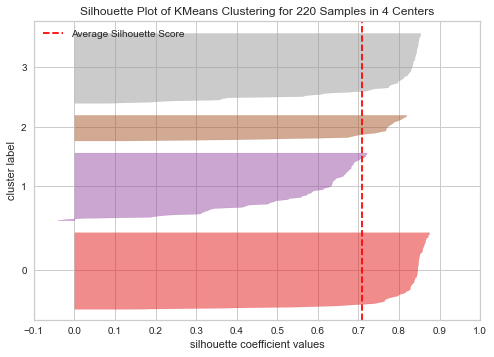

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 220 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
# Instantiate the clustering model and visualizer 
from yellowbrick.cluster import SilhouetteVisualizer
number_of_clusters = 4
model = KMeans(n_clusters = number_of_clusters, init = 'k-means++', random_state = 42,algorithm='lloyd')
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_H_matrix)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

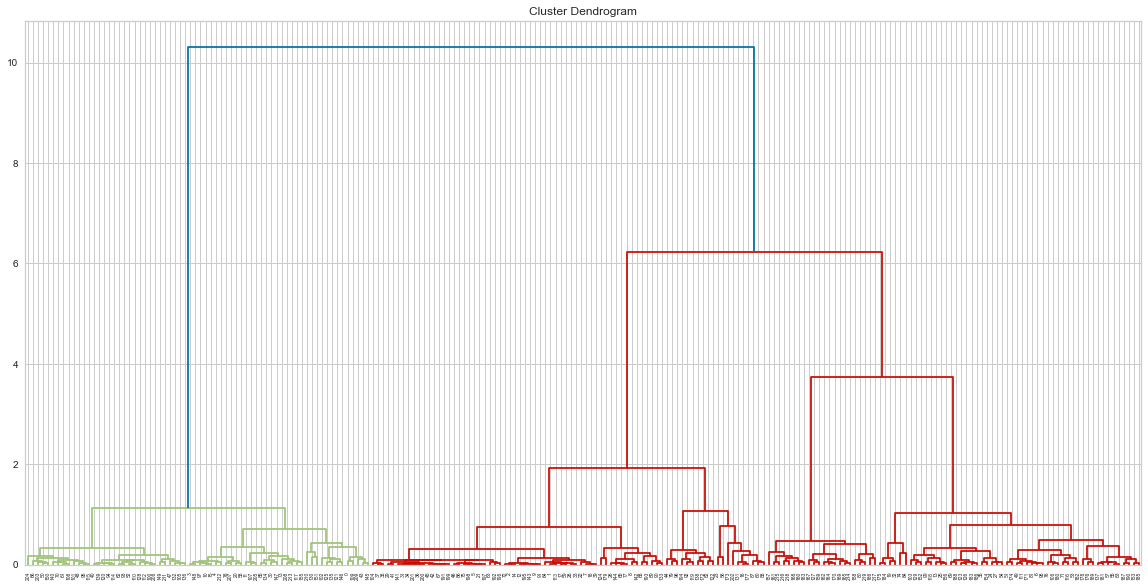

In [26]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))
plt.title("Cluster Dendrogram")
dend_plot = shc.dendrogram(shc.linkage(df_H_matrix, method='ward')) # Try different cluster proximity measure such as single
plt.savefig('dend_plot.png', format='png', bbox_inches='tight')

In [ ]:
# Another answer of how to evaluate the performance of the k-means clustering algorithm!

In [ ]:
# Extract the last characters of the index; the last character is the reference subgroup
#last_characters = df_MB.T.index.str[-1]  
#last_characters

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Extract the last characters of the index; the last character is the reference subgroup
last_characters = df_MB.T.index.str[-1]  

true_labels = [int(float(x)) for x in last_characters]  # convert the string label into number 

predicted_labels = kmeans_nmf.labels_  # obtained from the kmeans clustering 

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Display confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[ 0  0  0  0  0]
 [ 0  0 24  0  0]
 [70  0  0  0  0]
 [ 0 61  0  4  0]
 [ 0  1  0 60  0]]

Accuracy: 0.01818181818181818


In [28]:
true_labels

[2,
 4,
 4,
 2,
 2,
 4,
 3,
 4,
 4,
 4,
 2,
 2,
 4,
 3,
 4,
 2,
 3,
 4,
 4,
 3,
 2,
 4,
 4,
 2,
 3,
 3,
 4,
 3,
 4,
 4,
 2,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 4,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 4,
 3,
 2,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 3,
 2,
 3,
 4,
 2,
 1,
 4,
 3,
 4,
 2,
 4,
 1,
 3,
 3,
 3,
 1,
 2,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 4,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 4,
 2,
 3,
 1,
 2,
 3,
 2,
 3,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1]

In [29]:
predicted_labels

array([0, 3, 3, 0, 0, 3, 1, 3, 3, 3, 0, 0, 3, 1, 3, 0, 1, 3, 3, 1, 0, 3,
       3, 0, 1, 1, 3, 1, 3, 3, 0, 3, 1, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 3, 1, 0, 0, 3, 3, 3,
       0, 3, 3, 1, 0, 1, 3, 0, 2, 3, 1, 3, 0, 3, 2, 1, 1, 1, 2, 0, 3, 1,
       1, 3, 3, 3, 3, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0,
       0, 1, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 2, 0, 1, 0, 1,
       0, 3, 0, 0, 0, 1, 1, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

When dealing with clustering, the predicted cluster labels often do not directly match the ground-truth labels (e.g., "Cluster 1" in the predictions might correspond to "Cluster 3" in the ground truth). To resolve this issue, you can map the predicted labels to the ground-truth labels using a permutation mapping. Here’s how you can do it step by step in Python:

Steps to Align Cluster Labels:
Use a confusion matrix to evaluate the correspondence between true_labels and predicted_labels.
Solve the permutation problem to map the predicted labels to the ground-truth labels using the Hungarian algorithm (from scipy.optimize.linear_sum_assignment).

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# Example: True labels and predicted labels
#true_labels = np.array([2, 4, 4, 2, 2, 4, 3, 4, 4, 4, 2, 2, 4, 3, 4, 2, 3, 4, 4, 3, 2, 4, 4, 2, 3, 3, 4, 3, 4, 4])
#predicted_labels = np.array([1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2])

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Solve the permutation mapping using the Hungarian algorithm
row_ind, col_ind = linear_sum_assignment(-conf_matrix)  # Maximize accuracy (negative for maximization)

# Create a mapping from predicted to true labels
mapping = dict(zip(col_ind, row_ind))

# Map the predicted labels to the ground-truth labels
mapped_predicted_labels = np.array([mapping[label] for label in predicted_labels])

# Print the results
print("Original Predicted Labels:", predicted_labels)
print("Mapped Predicted Labels:  ", mapped_predicted_labels)
print("True Labels:              ", true_labels)


Original Predicted Labels: [0 3 3 0 0 3 1 3 3 3 0 0 3 1 3 0 1 3 3 1 0 3 3 0 1 1 3 1 3 3 0 3 1 3 3 1 3
 3 3 3 0 3 3 0 3 3 3 0 0 1 0 1 0 1 1 1 0 1 0 3 1 0 0 3 3 3 0 3 3 1 0 1 3 0
 2 3 1 3 0 3 2 1 1 1 2 0 3 1 1 3 3 3 3 0 0 0 3 0 1 1 0 0 0 1 3 0 1 0 0 0 0
 1 0 3 0 0 1 0 1 1 0 0 1 1 3 0 1 2 0 1 0 1 0 3 0 0 0 1 1 0 0 3 3 3 3 0 0 0
 0 0 0 0 1 1 1 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 1 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
Mapped Predicted Labels:   [2 4 4 2 2 4 3 4 4 4 2 2 4 3 4 2 3 4 4 3 2 4 4 2 3 3 4 3 4 4 2 4 3 4 4 3 4
 4 4 4 2 4 4 2 4 4 4 2 2 3 2 3 2 3 3 3 2 3 2 4 3 2 2 4 4 4 2 4 4 3 2 3 4 2
 1 4 3 4 2 4 1 3 3 3 1 2 4 3 3 4 4 4 4 2 2 2 4 2 3 3 2 2 2 3 4 2 3 2 2 2 2
 3 2 4 2 2 3 2 3 3 2 2 3 3 4 2 3 1 2 3 2 3 2 4 2 2 2 3 3 2 2 4 4 4 4 2 2 2
 2 2 2 2 3 3 3 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 4 3 3 3 3 3 4 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 3 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1]
True Labels:               [2, 4, 4, 2, 2, 4, 3, 4, 

Explanation:
Confusion Matrix:

The confusion matrix shows the overlap between predicted and true labels.
Each row corresponds to a true label, and each column corresponds to a predicted label.
Hungarian Algorithm:

Finds the optimal label assignment by maximizing the overlap between true and predicted labels.
The result is a mapping of predicted clusters to their corresponding true clusters.
Mapping Labels:

Use the mapping obtained to relabel the predicted clusters to match the true clusters.

Accuracy Calculation:
Once the predicted labels are aligned, you can calculate accuracy using:

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_labels, mapped_predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.9772727272727273


My first attempt, based on 7 as the best rank of NMF projection: Accuracy: 0.8863636363636364

My second attempt, based on 3 as the best rank of NMF projection: Accuracy: 0.9772727272727273